In [23]:
import numpy as np, matplotlib.pyplot as plt, seaborn.apionly as sns
import matplotlib as mpl 
%matplotlib inline

In [29]:
sns.set_context('poster')

$$f(x) = \cos(x) + x^2 + e^x$$

$$f^\prime(x) = -\sin(x) + 2x + e^x$$

In [3]:
def f(x):
    return np.cos(x) + np.power(x, 2.) + np.exp(x)

def grad_f(x):
    return -np.sin(x) + 2.*x + np.exp(x) 

In [4]:
def grad_check(x, epsilon):
    num = f(x+epsilon) - f(x-epsilon)
    den = 2*epsilon
    return num / den

In [40]:
def delta_grad(x, epsilon):
    grad1 = grad_f(x)
    grad2 = grad_check(x, epsilon)
    return np.abs(grad1-grad2)

In [41]:
xs = np.linspace(-10, 10, 15)
epsilons = np.logspace(-4, 0, 100)
results = {}
for x in xs:
    results[x] = delta_grad(x, epsilons)

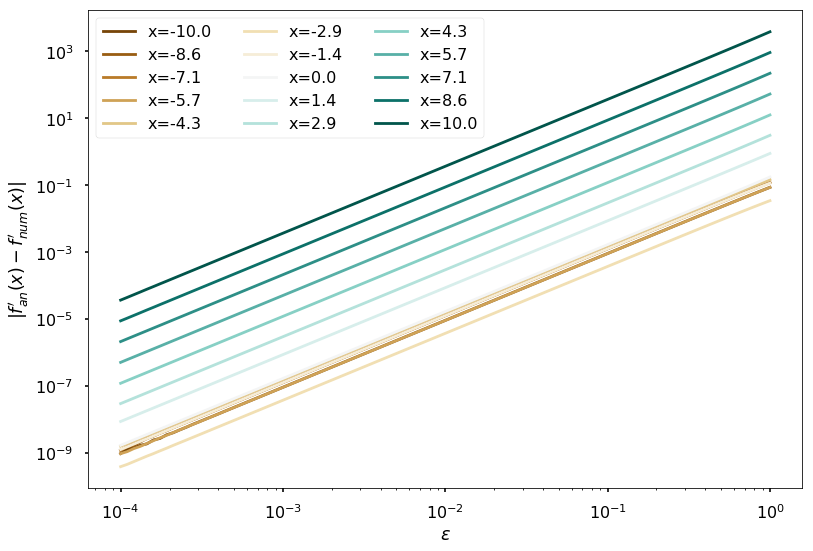

In [43]:
sns.set_palette(sns.color_palette("BrBG", len(xs)))
for k in sorted(results.keys()):
    plt.plot(epsilons, results[k], label='x=%.1f'%k)
plt.legend(loc=0, ncol=3)
plt.xscale('log'), plt.yscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\left|f^\prime_{an}(x) - f^\prime_{num}(x)\right|$')
plt.savefig('grad_check.pdf')